In [39]:
%pip install pandas 

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [42]:
import pandas as pd

In [43]:
import numpy as np

In [86]:
wine_df = pd.read_csv("../arquivosCsv/wine.csv")
wine_df.head(10)

,id,alcohol,fixed_acidity,residual_sugar,quality,density
0,0,13.6,9.3,6.4,high,1.0005
1,1,14.0,11.2,2.0,medium,0.9912
2,2,8.2,11.6,0.9,low,0.9935
3,3,12.7,12.9,6.6,low,1.0002
4,4,10.4,13.9,13.8,medium,0.9942
5,5,10.5,12.5,0.7,low,0.9933
6,6,13.1,4.3,9.0,high,0.9909
7,7,12.9,15.0,1.7,high,0.9917
8,8,13.2,12.3,6.6,medium,0.9936
9,9,9.9,12.2,14.4,medium,1.0021


In [87]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              1000 non-null   int64  
 1   alcohol         990 non-null    float64
 2   fixed_acidity   1000 non-null   float64
 3   residual_sugar  997 non-null    float64
 4   quality         1000 non-null   object 
 5   density         1000 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 47.0+ KB


In [88]:
wine_df.isnull().sum()

id                 0
alcohol           10
fixed_acidity      0
residual_sugar     3
quality            0
density            0
dtype: int64

In [89]:
wine_df.describe(include="all")

,id,alcohol,fixed_acidity,residual_sugar,quality,density
count,1000.000000,990.000000,1000.000000,997.000000,1000,1000.000000
unique,NaN,NaN,NaN,NaN,3,NaN
top,NaN,NaN,NaN,NaN,medium,NaN
freq,NaN,NaN,NaN,NaN,355,NaN
mean,499.500000,11.038081,10.174300,7.685757,NaN,0.997505
std,288.819436,1.763647,3.452693,4.213067,NaN,0.004300
min,0.000000,8.000000,4.000000,0.500000,NaN,0.990000
25%,249.750000,9.500000,7.100000,4.100000,NaN,0.993900
50%,499.500000,11.000000,10.400000,7.500000,NaN,0.997400
75%,749.250000,12.600000,13.125000,11.500000,NaN,1.001200


In [90]:
wine_df['alcohol'] = wine_df['alcohol'].fillna(wine_df['alcohol'].mean())

In [91]:
wine_df.isnull().sum()

id                0
alcohol           0
fixed_acidity     0
residual_sugar    3
quality           0
density           0
dtype: int64

In [92]:
wine_df['residual_sugar'] = wine_df['residual_sugar'].fillna(wine_df['residual_sugar'].mean())

In [81]:
wine_df.isnull().sum()

id                0
alcohol           0
fixed_acidity     0
residual_sugar    0
quality           0
density           0
dtype: int64

In [93]:
wine_df


,id,alcohol,fixed_acidity,residual_sugar,quality,density
0,0,13.6,9.3,6.4,high,1.0005
1,1,14.0,11.2,2.0,medium,0.9912
2,2,8.2,11.6,0.9,low,0.9935
3,3,12.7,12.9,6.6,low,1.0002
4,4,10.4,13.9,13.8,medium,0.9942
...,...,...,...,...,...,...
995,995,13.1,13.0,4.3,low,1.0035
996,996,9.5,6.4,5.3,low,1.0040
997,997,13.8,4.5,9.0,medium,0.9931
998,998,8.1,5.3,12.2,low,0.9955


In [94]:
quality_map = {'low': 0, 'medium': 1, 'high': 2}
wine_df['quality'] = wine_df['quality'].map(quality_map)
wine_df


,id,alcohol,fixed_acidity,residual_sugar,quality,density
0,0,13.6,9.3,6.4,2,1.0005
1,1,14.0,11.2,2.0,1,0.9912
2,2,8.2,11.6,0.9,0,0.9935
3,3,12.7,12.9,6.6,0,1.0002
4,4,10.4,13.9,13.8,1,0.9942
...,...,...,...,...,...,...
995,995,13.1,13.0,4.3,0,1.0035
996,996,9.5,6.4,5.3,0,1.0040
997,997,13.8,4.5,9.0,1,0.9931
998,998,8.1,5.3,12.2,0,0.9955


In [98]:
from sklearn.decomposition import PCA

In [99]:
X = wine_df.to_numpy()
pca = PCA(n_components=2)
components = pca.fit_transform(X)
components

array([[-499.50120192,   -1.07753145],
       [-498.50243024,   -5.68929014],
       [-497.50057918,   -6.74118422],
       ...,
       [ 497.49922315,    1.91219033],
       [ 498.50209612,    5.06383489],
       [ 499.50191622,    6.78093285]], shape=(1000, 2))

In [100]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3)

In [101]:
model.fit(components)

KMeans(n_clusters=3)

In [102]:
labels = model.predict(components)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [104]:
import matplotlib.pyplot as plt

In [106]:
x = components[:, 0]  # sepal length
y = components[:, 1]  # petal length

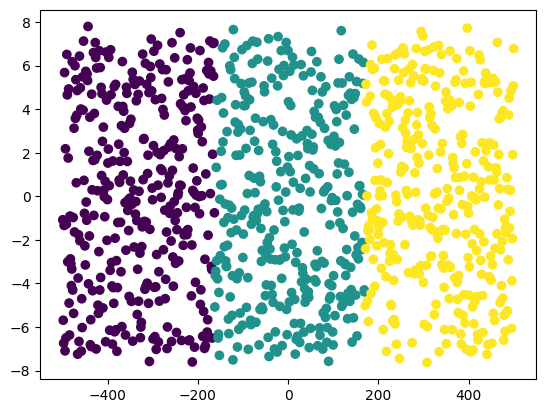

In [107]:
plt.scatter(x, y, c=labels)
plt.show()

In [111]:
# Exemplo: suposição de dados
cluster_labels = model.predict(labels) # [1, 1, 2, 2, 1, 0, ...]  # rótulos atribuídos pelo KMeans
true_species = ["tinto", "rose", "branco"]

# Criar DataFrame
df = pd.DataFrame({
    'cluster': cluster_labels,
    'species': true_species
})
df

ValueError: Expected 2D array, got 1D array instead:
array=[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.